In [23]:
from matplotlib import use, cm
import numpy as np
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
plt.style.use('ggplot')

## data

In [9]:
data = scipy.io.loadmat('ex7data1.mat')
X = data['X']
X.shape

(50, 2)

(0.0, 7.0, 2.0, 8.0)

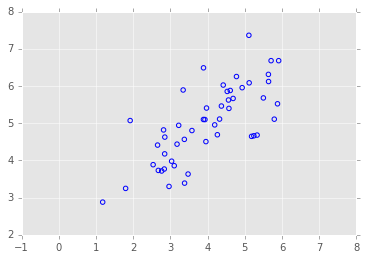

In [16]:
# plt.plot(X[:,0],X[:,1], 'x')
plt.scatter(X[:,0],X[:,1],marker='o', color='b', facecolors='none', lw=1.0)
plt.axis('equal')

## Feature normalization

(50, 2) (2,) (2,)


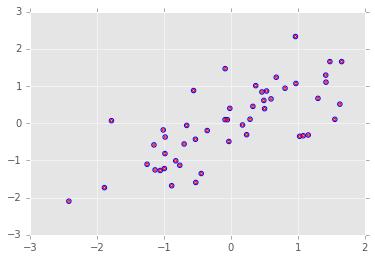

In [85]:
def normalize_features(X):
    X = np.array(X)
    mu = np.mean(X,axis=0)
    sigma = np.std(X, axis=0)
    
    return (X-mu)/sigma, mu, sigma

X_n,mu,sigma = normalize_features(X)
print X_n.shape, mu.shape, sigma.shape
plt.scatter(X_n[:,0],X_n[:,1],marker='o', color='b', facecolors='none', lw=1.0)

# using sklearn
scaler = sklearn.preprocessing.StandardScaler()
X_s = scaler.fit_transform(X)
plt.scatter(X_s[:,0],X_n[:,1],marker='.', color='r', facecolors='none', lw=1.0)

## SVD decomposition

In [101]:
def cov(X):
    n = len(X)
    return (1/float(n)) * np.dot(X.T,X)

print cov(X)
# print np.cov(X)[:2, :2]

[[ 17.26276267  20.82286988]
 [ 20.82286988  26.05448259]]


mu: [ 3.98926528  5.00280585] sigma: [ 1.16126017  1.01312201]
U: (2, 2) mu: (2,) mu2: (2,)
Top eigenvector (PC): 
 U(:,0) = %f %f  [-0.70710678 -0.70710678] [-0.70710678  0.70710678]
(you should expect to see -0.707107 -0.707107)


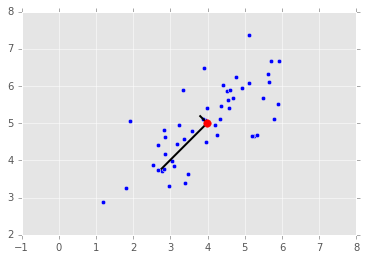

In [132]:
import numpy.linalg
print "mu:",mu,"sigma:", sigma
U,S,V = np.linalg.svd(cov(X_n))
center = (mu[0],mu[1])
axis1 = (center[0]+S[0]*U[0,0],center[1]+S[0]*U[0,1])
axis2 = (center[0]+S[1]*U[1,0],center[1]+S[1]*U[1,1])

plt.plot([mu[0], axis1[0]], [mu[1], axis1[1]], '-k', lw=2)
plt.plot([mu[0], axis2[0]], [mu[1], axis2[1]], '-k', lw=2)
plt.plot(center[0],center[1],'r.', ms=15)
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

print "U:",U.shape,"mu:",mu.shape,"mu2:",mu2.shape
print 'Top eigenvector (PC): '
print ' U(:,0) = %f %f ', U[:,0], U[:,1]
print '(you should expect to see -0.707107 -0.707107)'

## Dimension reduction (data projection)

In [143]:
def project_data(X,U,K):
    # X: number of samples * number of features
    reduced = U[:,:K] #number of features * number of components to keep
    return np.dot(X,reduced)

K = 1
z = project_data(X_n, U, K)

def recover_data(Z,U,K):
    # z: n_samples * n_pc
    # U: n_features * n_pc
    # K: 
    return np.dot(z,U[:,:K].T)

X_rec = recover_data(z,U,K)
print X_rec[0], X_n[0]

[-1.05805279 -1.05805279] [-0.52331306 -1.59279252]


(-3.0, 2.0, -3.0, 3.0)

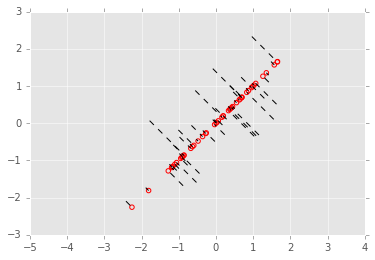

In [147]:
plt.scatter(X_rec[:, 0], X_rec[:, 1], marker='o', color='r', facecolor='none', lw=1.0)
for i in range(len(X_n)):
    plt.plot([X_n[i, 0], X_rec[i, 0]], [X_n[i, 1], X_rec[i, 1]], '--k')
plt.axis("equal")